In [1]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools
import matplotlib
from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 8)

The purpose of this notebook is to verify the LBWSG exposure implementation relative to GBD

In [2]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [3]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({'population':
                              {'population_size': 100_000,
                              'age_end':28/365,
                              'exit_age':28/365},
                          'time':
                              {'end':
                                  {'year': 2022,
                                  'month': 2,
                                  'day': 9}}
                          })
sim.setup()

2021-12-23 11:03:29.316 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2021-12-23 11:03:29.542 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2021-12-23 11:03:29.544 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2021-12-23 11:03:29.545 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
2021-12-23 11:03:30.276 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline cause_specific_mortality_rate
2021-12-23 11:03:30.277 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mortality_rate
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-

2021-12-23 11:03:34.994 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.paf.1.lookup_table_39 as modifier to lower_respiratory_infections.incidence_rate.paf
2021-12-23 11:03:34.995 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline child_stunting.propensity
2021-12-23 11:03:34.996 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline child_stunting.exposure
2021-12-23 11:03:35.260 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.child_stunting.exposure_parameters
2021-12-23 11:03:35.903 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.incidence_rate.2.adjust_target as modifier to diarrheal_diseases.incidence_rate
2021-12-23 11:03:35.904 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registeri

2021-12-23 11:03:39.900 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.dwell_time
2021-12-23 11:03:39.901 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.disability_weight
2021-12-23 11:03:39.902 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering disability_weight.6.mild_child_wasting.disability_weight as modifier to disability_weight
2021-12-23 11:03:39.903 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate
2021-12-23 11:03:39.904 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate.population_attributable_fraction
2021-12-23 11:03:39.905 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering mortality_rate.6.riskstate.mild_ch

2021-12-23 11:03:41.792 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.8.categorical_risk_observer.child_stunting.metrics as modifier to metrics
2021-12-23 11:03:41.793 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline metrics


## Capture birthweight at initialization
For the early and late neonatal age groups

In [4]:
pop0 = sim.get_population()
pop0

,tracked,previous_child_wasting,previous_lower_respiratory_infections,previous_measles,previous_diarrheal_diseases,years_lived_with_disability,cause_of_death,years_of_life_lost,age,exit_time,...,measles,measles_event_count,measles_event_time,susceptible_to_measles_event_count,susceptible_to_measles_event_time,diarrheal_diseases,diarrheal_diseases_event_count,diarrheal_diseases_event_time,susceptible_to_diarrheal_diseases_event_count,susceptible_to_diarrheal_diseases_event_time
0,True,,,,,0.0,not_dead,0.0,0.044994,NaT,...,susceptible_to_measles,0,NaT,0,NaT,diarrheal_diseases,0,2021-12-31 12:00:00,0,NaT
1,True,,,,,0.0,not_dead,0.0,0.046464,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT
2,True,,,,,0.0,not_dead,0.0,0.052629,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT
3,True,,,,,0.0,not_dead,0.0,0.075327,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,,,,,0.0,not_dead,0.0,0.057286,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT
99997,True,,,,,0.0,not_dead,0.0,0.044341,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT
99998,True,,,,,0.0,not_dead,0.0,0.061990,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT
99999,True,,,,,0.0,not_dead,0.0,0.022806,NaT,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,0,NaT


In [5]:
data = pd.concat([pop0.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop0.index),
                 sim.get_value('low_birth_weight.exposure')(pop0.index)], axis=1)
data['age_group'] = np.where(data.age<7/365,'early_neonatal',
                           np.where(data.age<28/365,'late_neonatal',
                                   np.where(data.age<1,'post_neonatal', '1_to_5')))
data

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,age_group
0,0.044994,Male,cat40,2580.395737,late_neonatal
1,0.046464,Male,cat52,3448.290620,late_neonatal
2,0.052629,Female,cat42,2926.178834,late_neonatal
3,0.075327,Female,cat54,3681.270909,late_neonatal
...,...,...,...,...,...
99996,0.057286,Female,cat51,3125.716861,late_neonatal
99997,0.044341,Female,cat51,3457.984768,late_neonatal
99998,0.061990,Male,cat44,2530.101153,late_neonatal
99999,0.022806,Male,cat48,3033.461668,late_neonatal


## Capture birth weight at birth and run until entirely new population of early and late neonatates

(all born into the sim rather than initialized into the sim)

In [45]:
pop_t = pop0.copy()
new_births = pd.DataFrame()
for x in list(range(0,56)):
    sim.step()
    pop_t_minus_1 = pop_t.copy()
    pop_t = sim.get_population()
    simulants = [i for i in pop_t.index if i not in pop_t_minus_1.index]
    new_births = new_births.append(pd.concat([pop_t.loc[simulants][['age','sex']],
             sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop_t.loc[simulants].index),
             sim.get_value('low_birth_weight.exposure')(pop_t.loc[simulants].index)], axis=1))

2021-12-23 11:21:43.460 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-07 00:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2021-12-23 11:22:40.296 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-07 12:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2021-12-23 11:24:25.121 | DEBUG    | vivariu

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2021-12-23 11:41:03.741 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-16 00:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2021-12-23 11:42:07.247 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-16 12:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ci

2021-12-23 12:03:43.273 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-24 12:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2021-12-23 12:04:57.912 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-25 00:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2021-12-23 12:06:12.340 | DEBUG    | vivariu

In [46]:
new_births['age_group'] = 'birth'

## Capture birthweight at end of run

In [47]:
pop1 = sim.get_population()

In [48]:
data1 = pd.concat([pop1.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop1.index),
                 sim.get_value('low_birth_weight.exposure')(pop1.index)], axis=1)
data1['age_group'] = np.where(data1.age<7/365,'early_neonatal',
                           np.where(data1.age<28/365,'late_neonatal',
                                   np.where(data1.age<1,'post_neonatal', '1_to_5')))

data_b = data1.loc[data1.age<=0.5/365]
data_b['age_group'] = 'birth'
data1 = pd.concat([data1,data_b], ignore_index=True)
data1

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,age_group
0,0.004256,Male,cat44,2894.177181,early_neonatal
1,0.009126,Female,cat48,3030.694227,early_neonatal
2,0.018113,Male,cat52,3031.470663,early_neonatal
3,0.010439,Male,cat52,3184.238711,early_neonatal
...,...,...,...,...,...
103788,0.001250,Male,cat52,3290.490054,birth
103789,0.000131,Female,cat55,3726.968971,birth
103790,0.000854,Female,cat52,3270.917903,birth
103791,0.000397,Female,cat55,3594.525425,birth


# Load artifact data

In [49]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2019', f'age_end <= 5'])

In [15]:
art_exposure = art.load(f'risk_factor.low_birth_weight_and_short_gestation.exposure')['draw_0'].reset_index()
art_cats = art.load(f'risk_factor.low_birth_weight_and_short_gestation.categories')
art_exposure['bw_start'] = np.nan
art_exposure['bw_end'] = np.nan
art_exposure['ga_start'] = np.nan
art_exposure['ga_end'] = np.nan
for i in art_exposure.index:
    art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
    art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
    art_exposure['ga_start'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(', ')[0]
    art_exposure['ga_end'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(') wks')[0].split(', ')[1]
    
art_exposure['bw_mid'] = (art_exposure.bw_end - art_exposure.bw_start)/2 + art_exposure.bw_start
art_exposure['ga_mid'] = (art_exposure.ga_end - art_exposure.ga_start)/2 + art_exposure.ga_start
art_exposure['age_group'] = np.where(art_exposure.age_end==0,'birth',
                                    np.where(art_exposure.age_start==0,'early_neonatal',
                                            np.where(art_exposure.age_end < 0.08, 'late_neonatal', 'other')))
art_exposure

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,sex,age_start,age_end,year_start,year_end,parameter,draw_0,bw_start,bw_end,ga_start,ga_end,bw_mid,ga_mid,age_group
0,Female,-1.000000,0.000000,2019,2020,cat10,0.001853,500.0,1000.0,24.0,26.0,750.0,25.0,birth
1,Female,-1.000000,0.000000,2019,2020,cat106,0.000644,1000.0,1500.0,36.0,37.0,1250.0,36.5,birth
2,Female,-1.000000,0.000000,2019,2020,cat11,0.001160,500.0,1000.0,26.0,28.0,750.0,27.0,birth
3,Female,-1.000000,0.000000,2019,2020,cat116,0.001423,1000.0,1500.0,38.0,40.0,1250.0,39.0,birth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Male,0.019178,0.076712,2019,2020,cat89,0.001273,3000.0,3500.0,30.0,32.0,3250.0,31.0,late_neonatal
345,Male,0.019178,0.076712,2019,2020,cat90,0.000562,3500.0,4000.0,30.0,32.0,3750.0,31.0,late_neonatal
346,Male,0.019178,0.076712,2019,2020,cat95,0.003673,3000.0,3500.0,32.0,34.0,3250.0,33.0,late_neonatal
347,Male,0.019178,0.076712,2019,2020,cat96,0.002109,3500.0,4000.0,32.0,34.0,3750.0,33.0,late_neonatal


In [16]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

## Prep simulation output data

In [17]:
# merge in birthweight category values from the artifact (selecting female and birth just for a template)
def prep_simulation_data(data):
    sim_data = (data.rename(columns={'risk_factor.low_birth_weight_and_short_gestation_exposure':'parameter'})
                .merge(art_exposure.loc[(art_exposure.sex=='Female') & (art_exposure.age_end==0)]
                       [['parameter','bw_end','bw_start','bw_mid','ga_mid']], on=['parameter']))
    assert np.all((sim_data['risk_factor.low_birth_weight.exposure'] < sim_data.bw_end)
                  & (sim_data['risk_factor.low_birth_weight.exposure'] > sim_data.bw_start))
    sim_data['count'] = 1
    num = sim_data.groupby(['sex','age_group','parameter','bw_mid','ga_mid']).sum()[['count']]
    den = sim_data.groupby(['sex','age_group']).sum()[['count']]
    prev = (num/den).reset_index()
    return prev

In [50]:
# at initialization
prev = prep_simulation_data(data)

# at birth
births = prep_simulation_data(new_births)

# at 40 days
prev1 = prep_simulation_data(data1)

In [19]:
def bar_chart(sex, age_group, log=True):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
         .sort_values(by='draw_0'))

    barWidth = 0.4
    a = np.arange(len(p))
    b = [x + barWidth for x in a]
    plt.figure(dpi=200)
    plt.bar(a, p.draw_0, width=barWidth, label='Artifact')
    plt.bar(b, p['count'], width=barWidth, label='Simulation')
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlabel('LBSWG category')
    if log==True:
        plt.semilogy()
    plt.xticks([])
    plt.title(f'{age_group} {sex} at initialization')

In [37]:
def plot_exposure_heat_map(sex, age_group, prev, time):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
    p = p.replace(np.nan, 0)
    p['diff'] = p.draw_0 - p['count']
    p['percent_diff'] = p['diff'] / p.draw_0 * 100

    s = p.pivot_table(index='ga_mid', columns='bw_mid', values='draw_0').sort_index(ascending=False)
    s = s.replace(0,np.nan)
    s = np.log(s/(1-s))
    a = p.pivot_table(index='ga_mid', columns='bw_mid', values='percent_diff').sort_index(ascending=False)
    a = a.replace(0,np.nan)
    #a=np.log(a/(1-a))
    fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
    sns.heatmap(s, ax=ax1,annot=True,cmap="coolwarm",vmin=-11,vmax=-1.5)
    sns.heatmap(a, ax=ax2,annot=True,cmap="coolwarm",vmin=-50,vmax=50)
    ax1.set_title('Logit-transformed exposure\ndistribution from artifact')
    ax2.set_title('Simulation exposure relative\nto artifact percent difference')
    for ax in [ax1,ax2]:
        ax.set_xlabel('Birthweight midpoint (g)')
        ax.set_ylabel('Gestational age midpoint (weeks)')
    plt.subplots_adjust(right=1.8, top=1)    
    plt.suptitle(f'{age_group} {sex}s {time}',
                x=0.9, y=1.25)

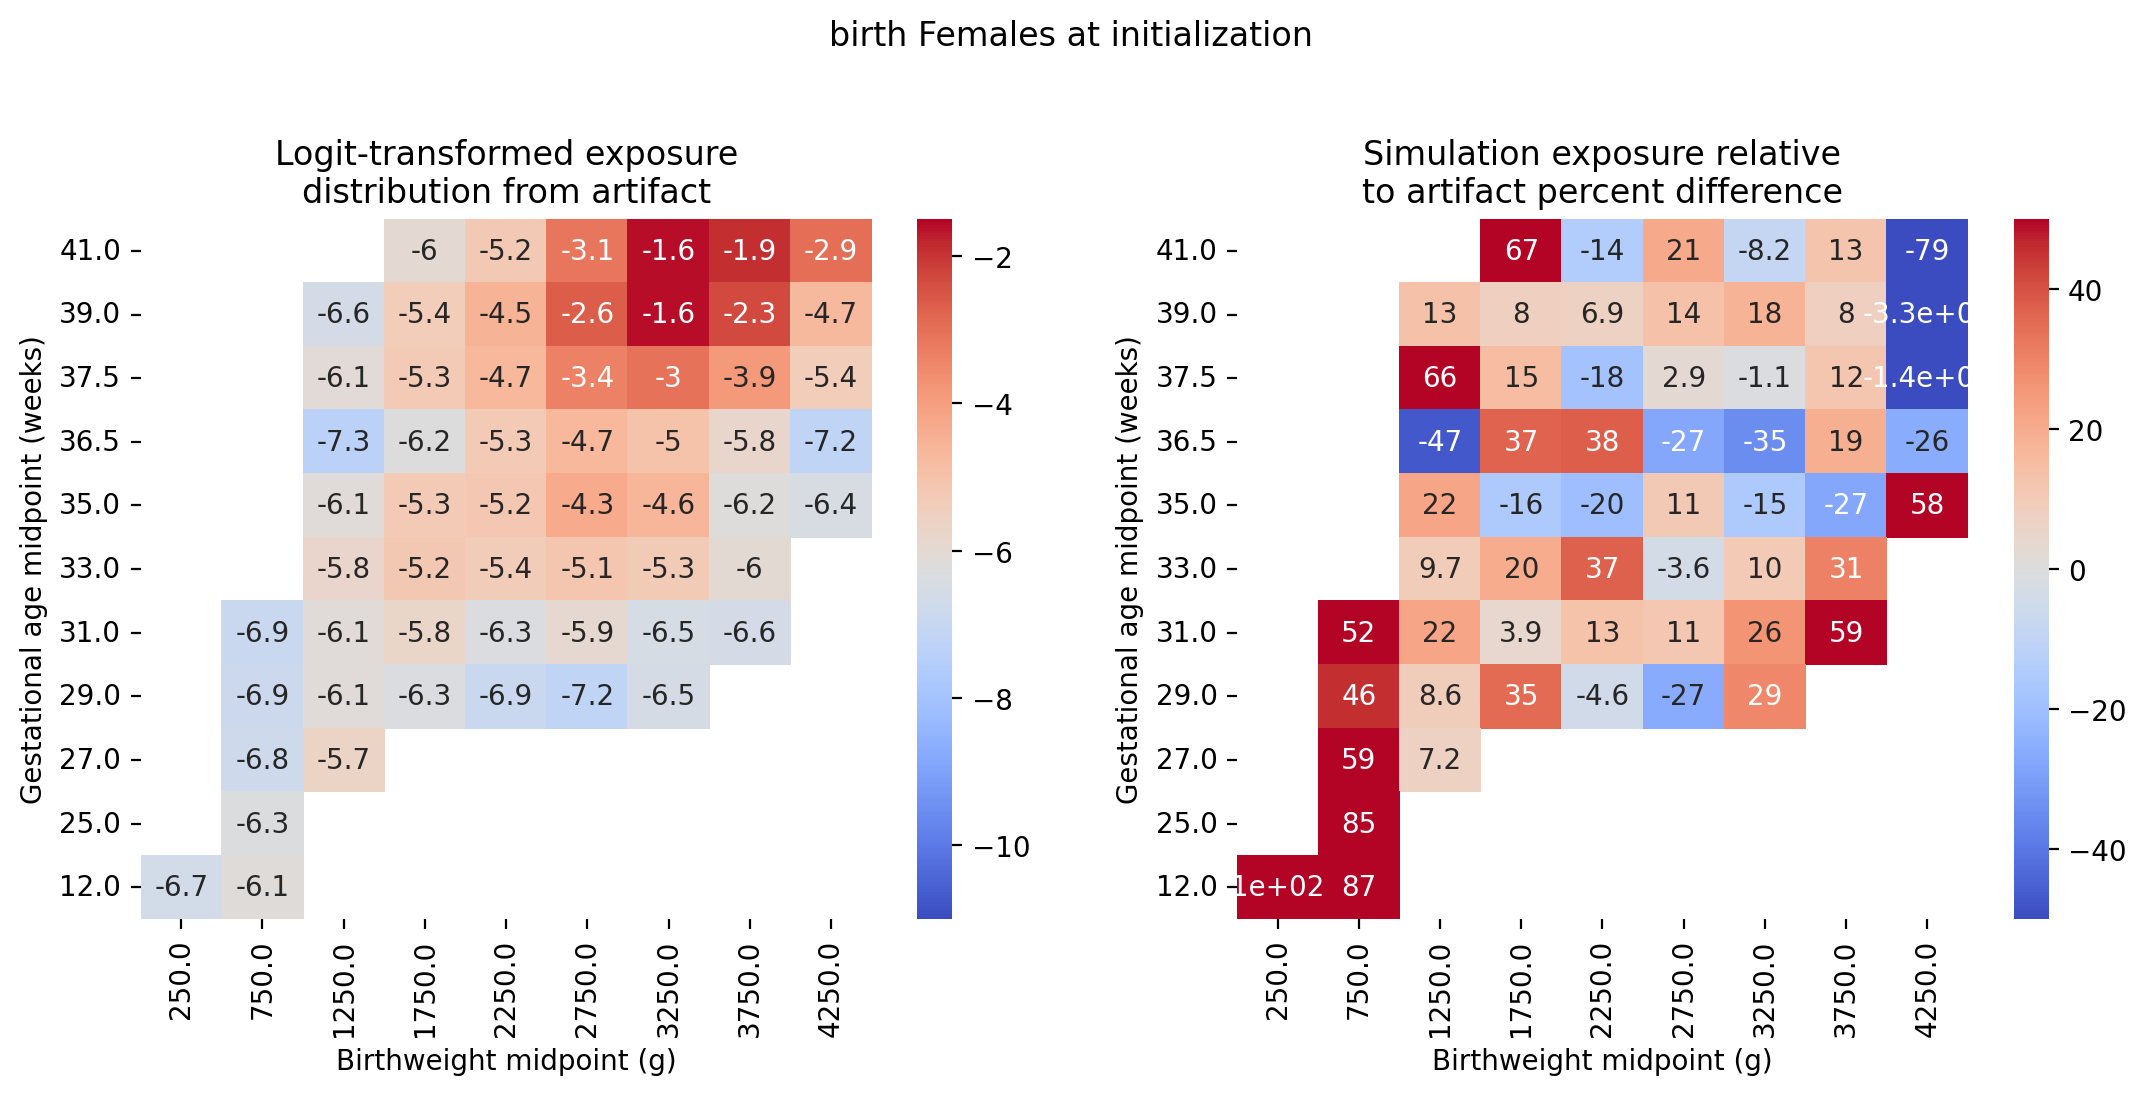

In [44]:
plot_exposure_heat_map('Female', 'birth', births, 'at initialization')

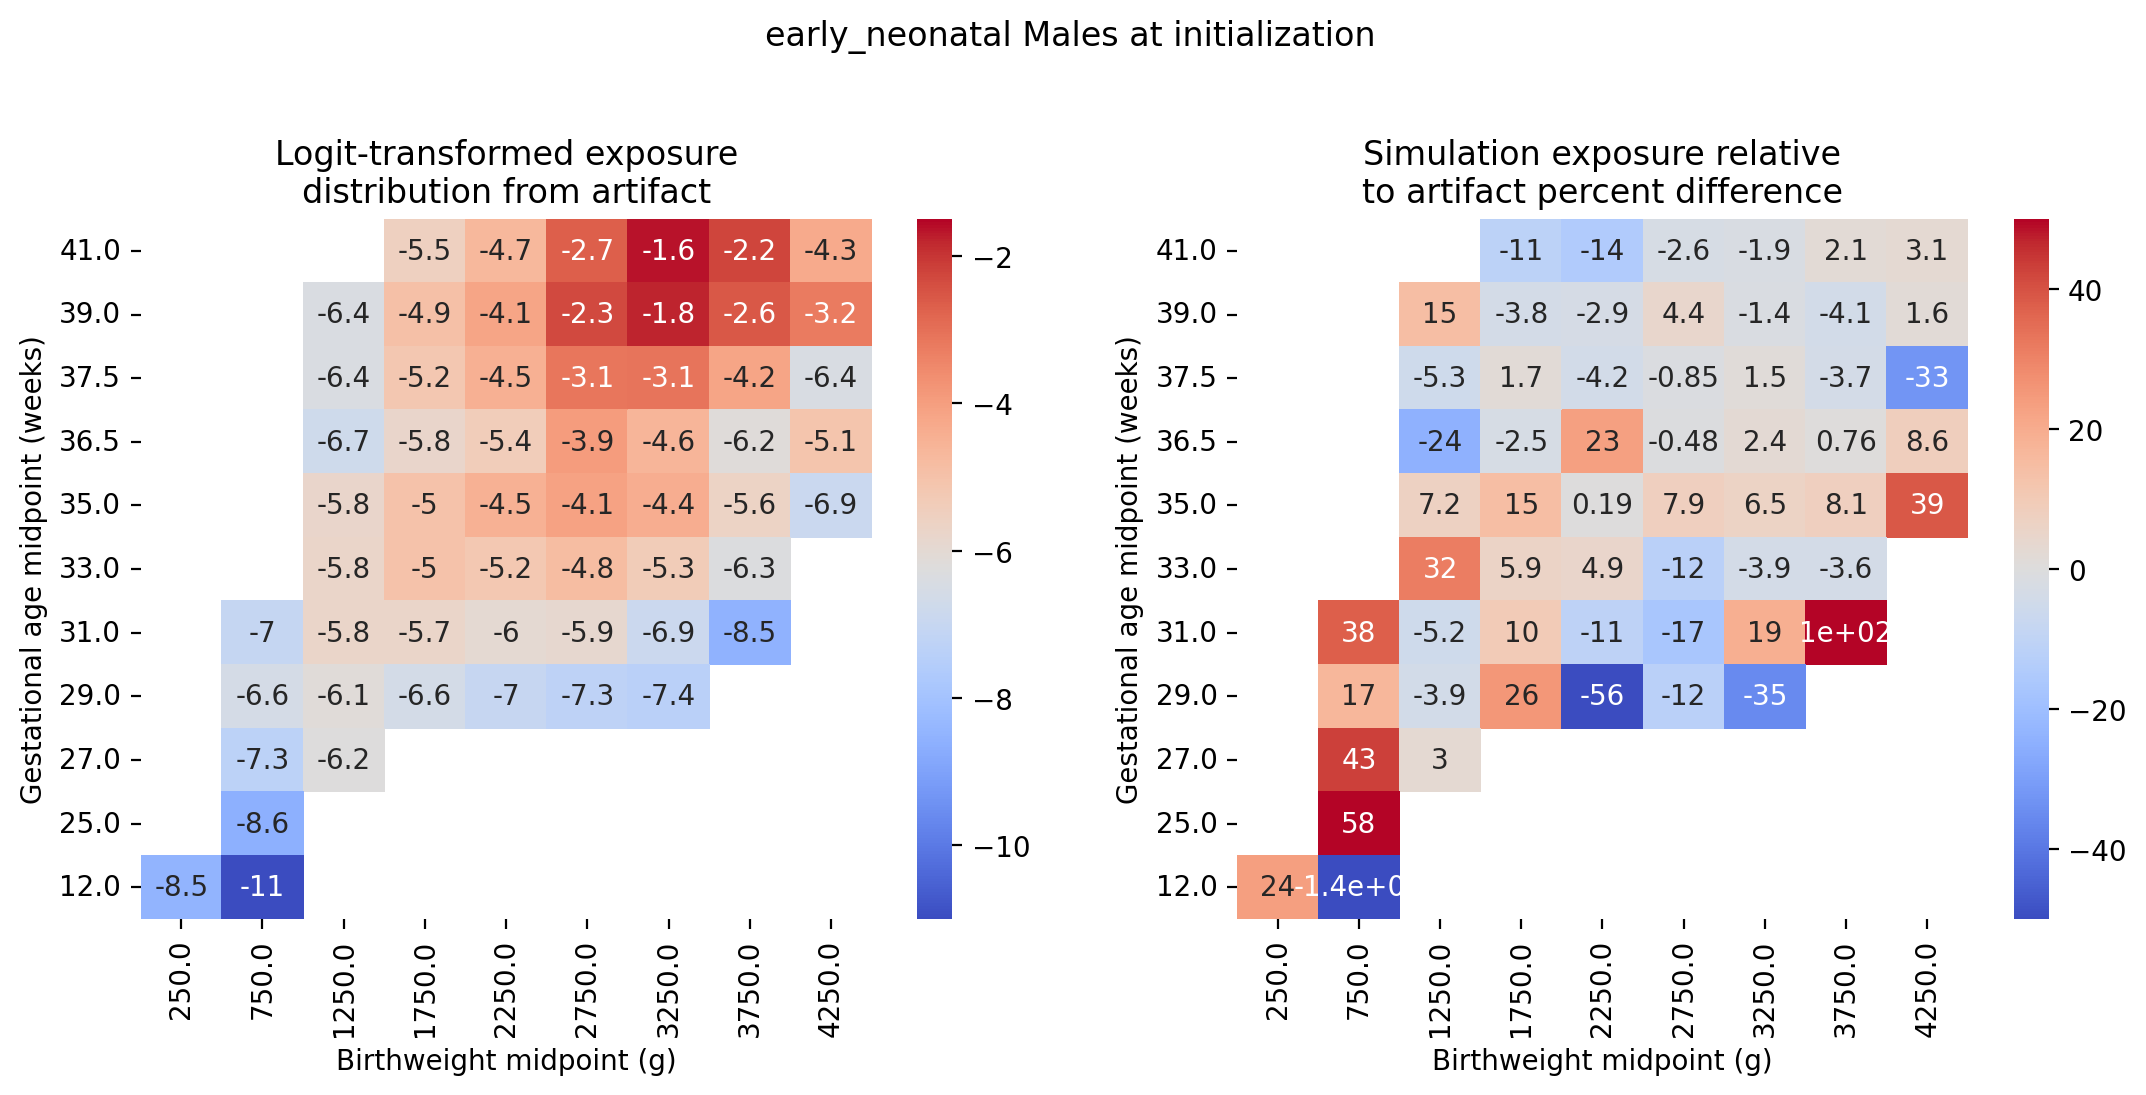

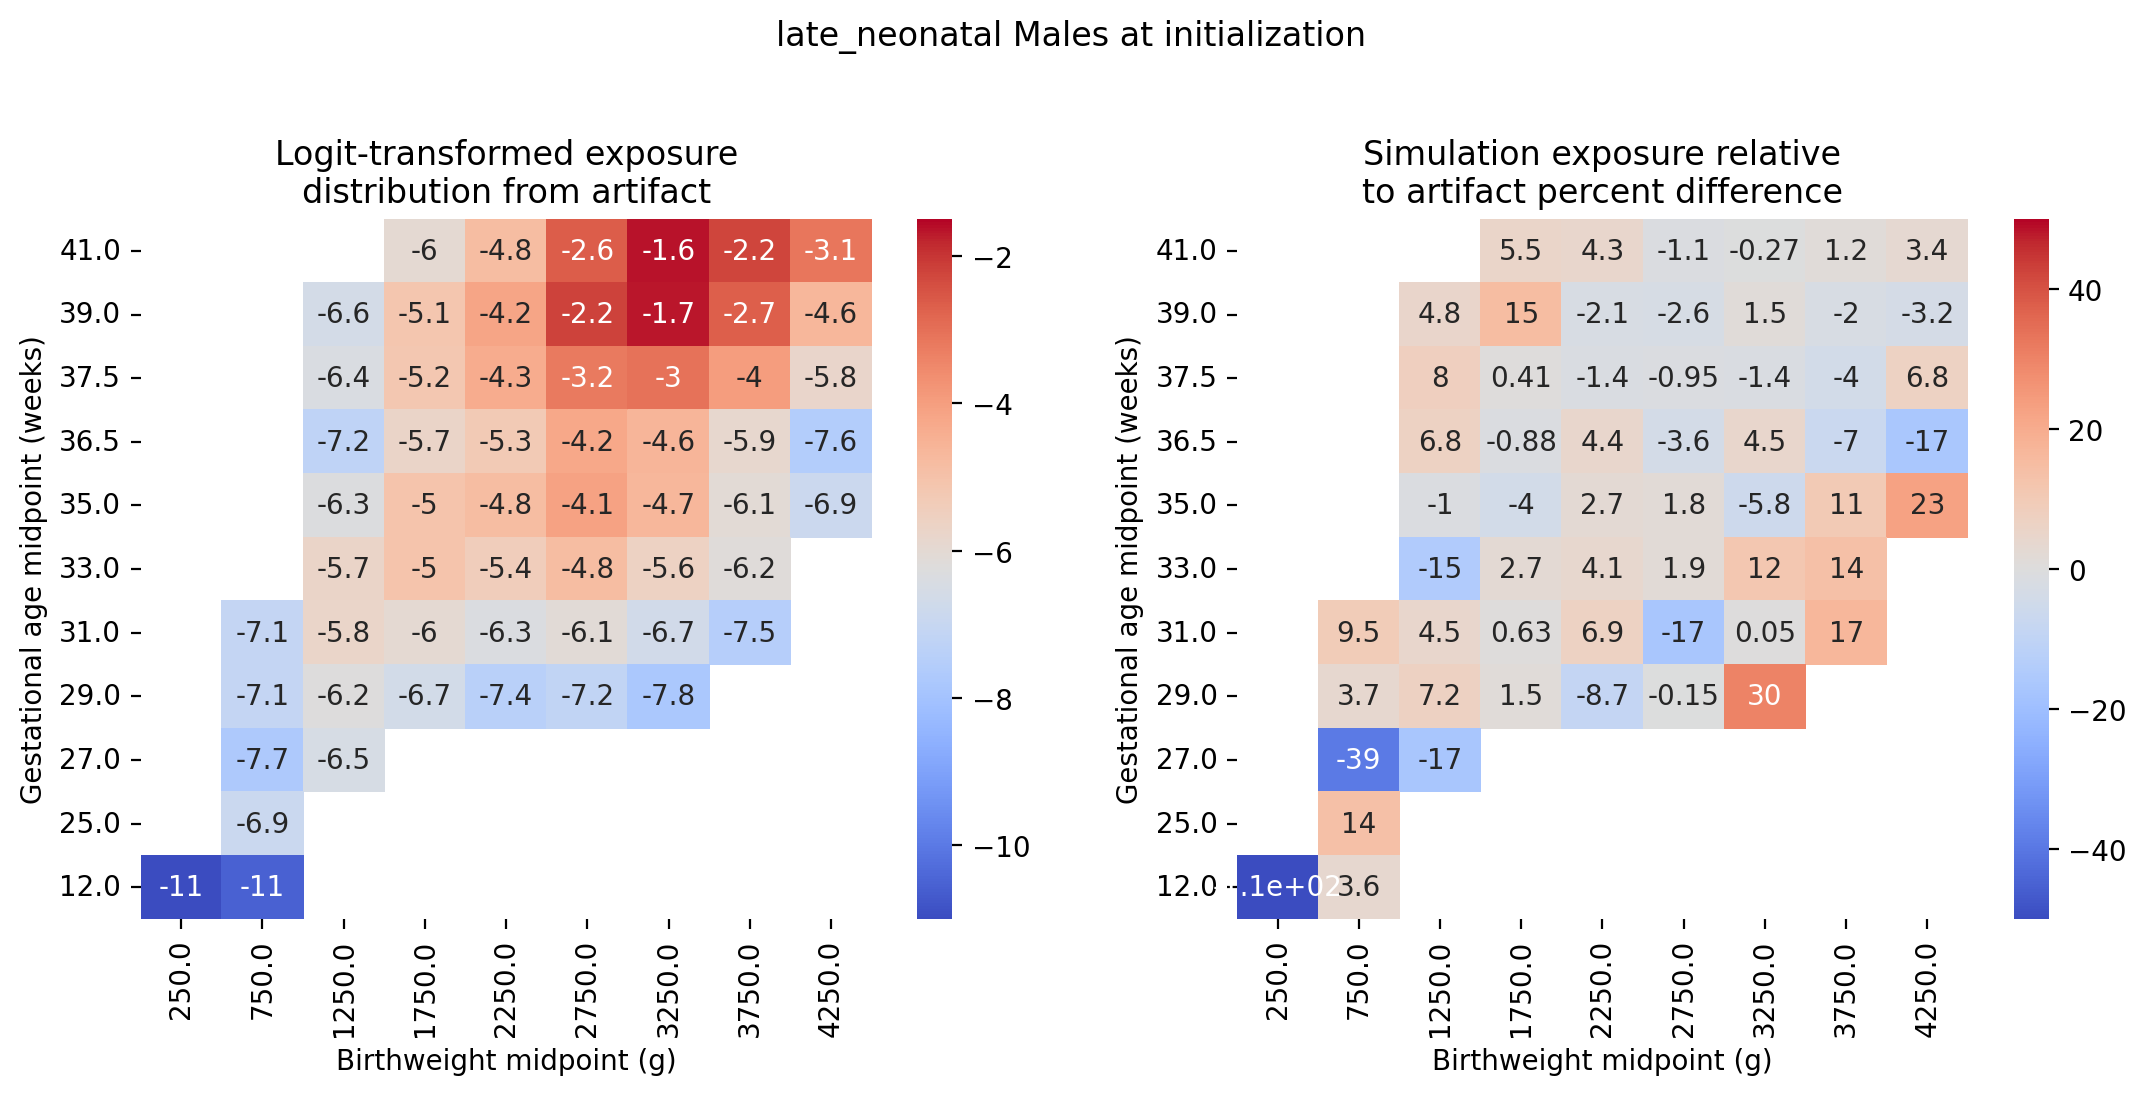

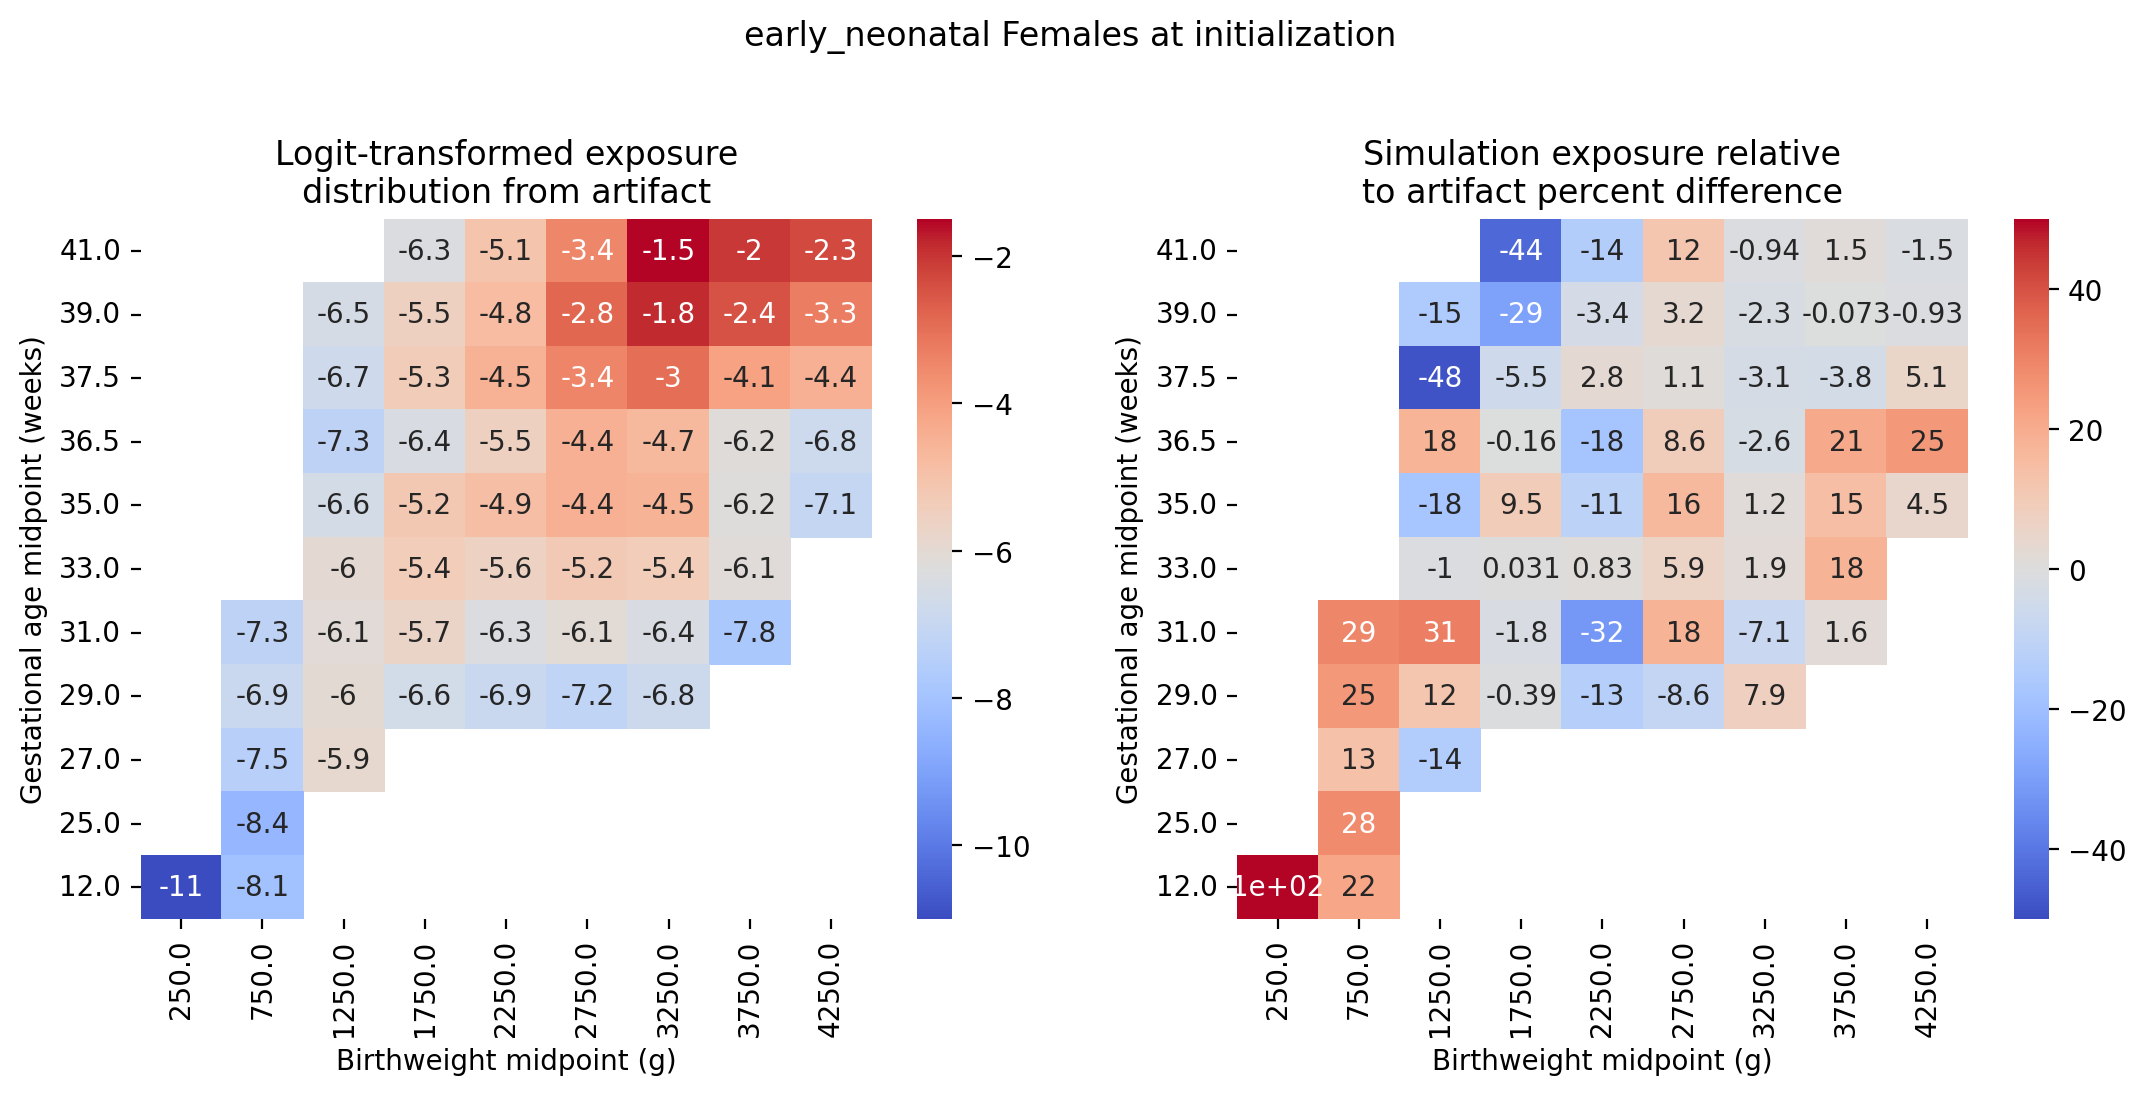

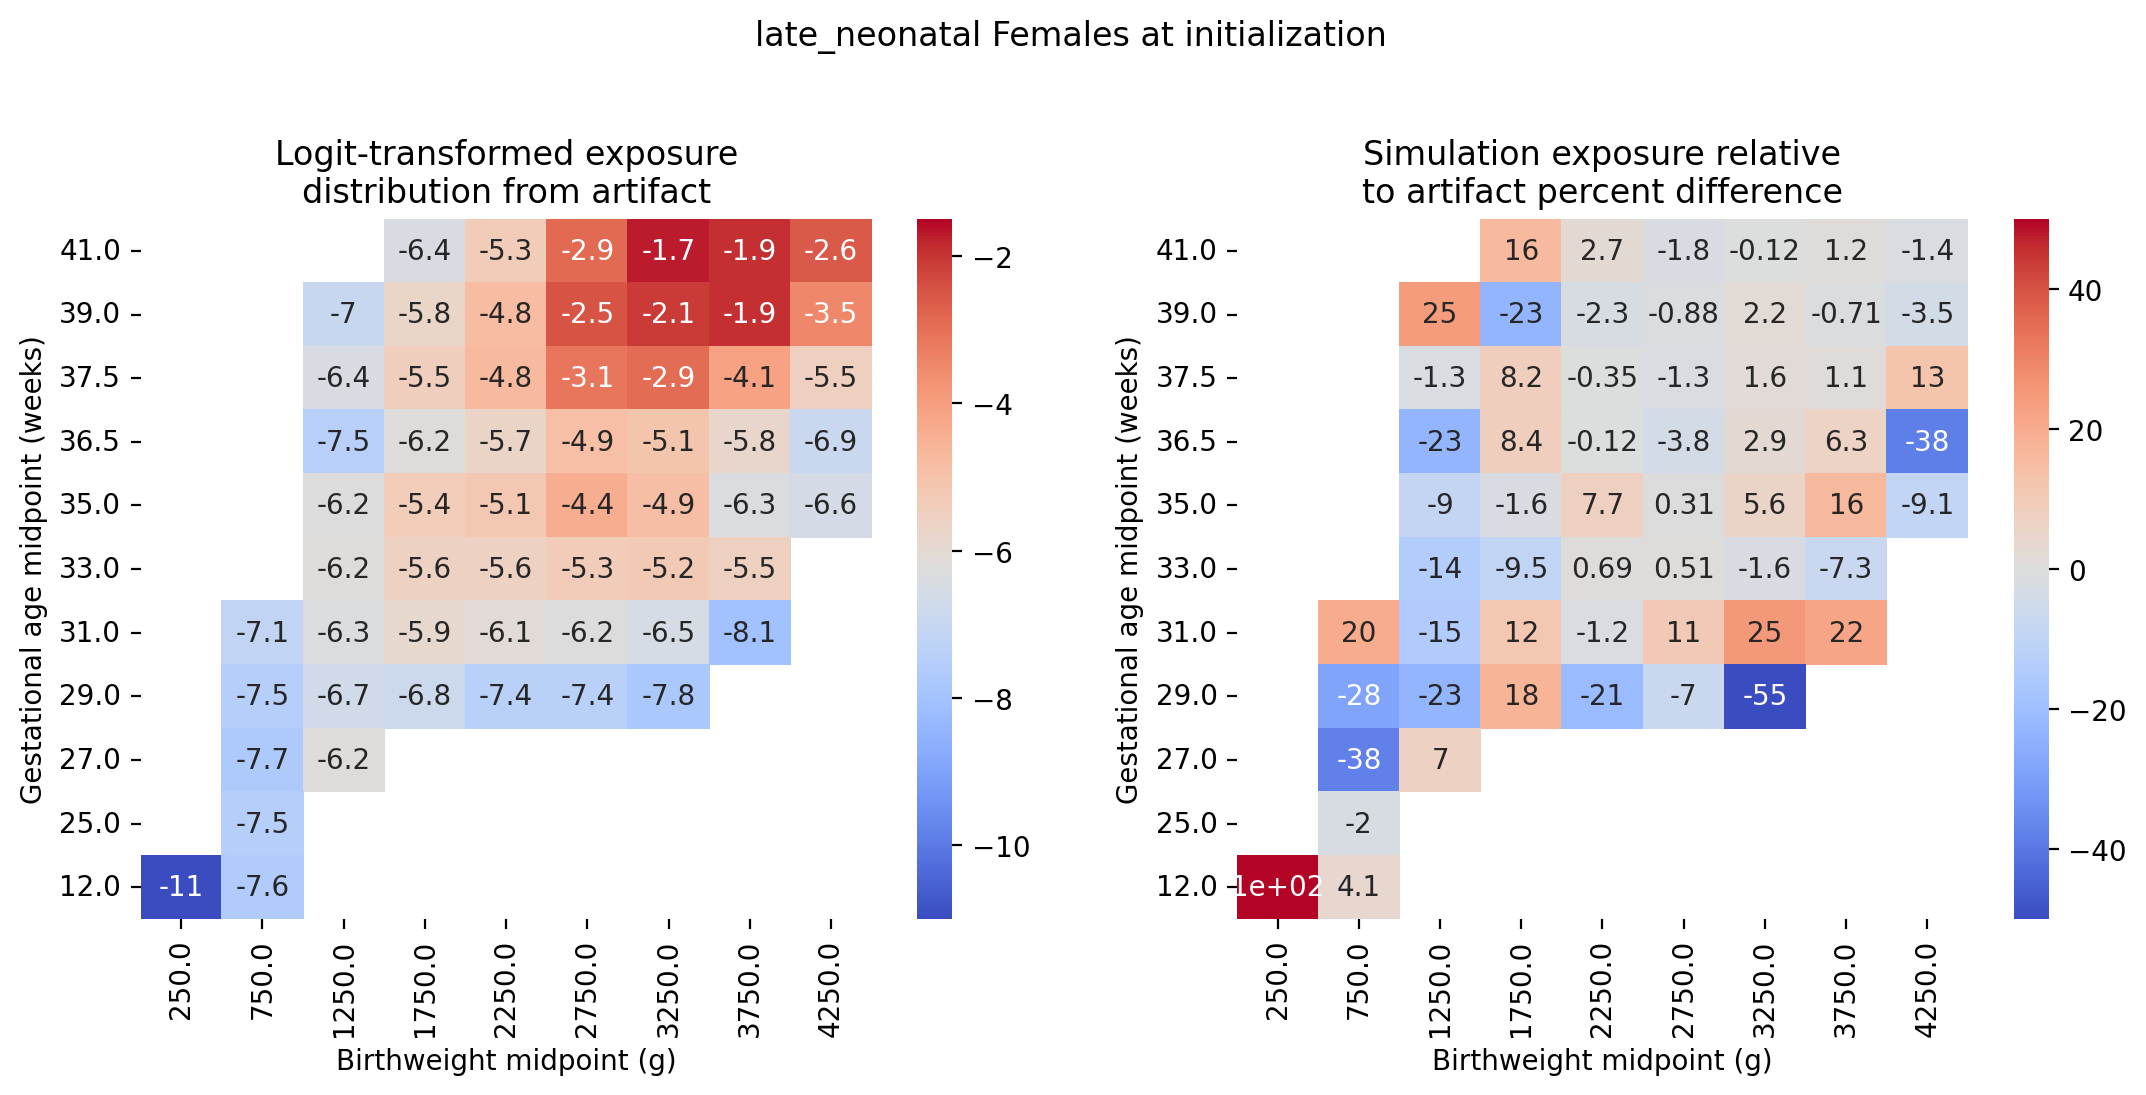

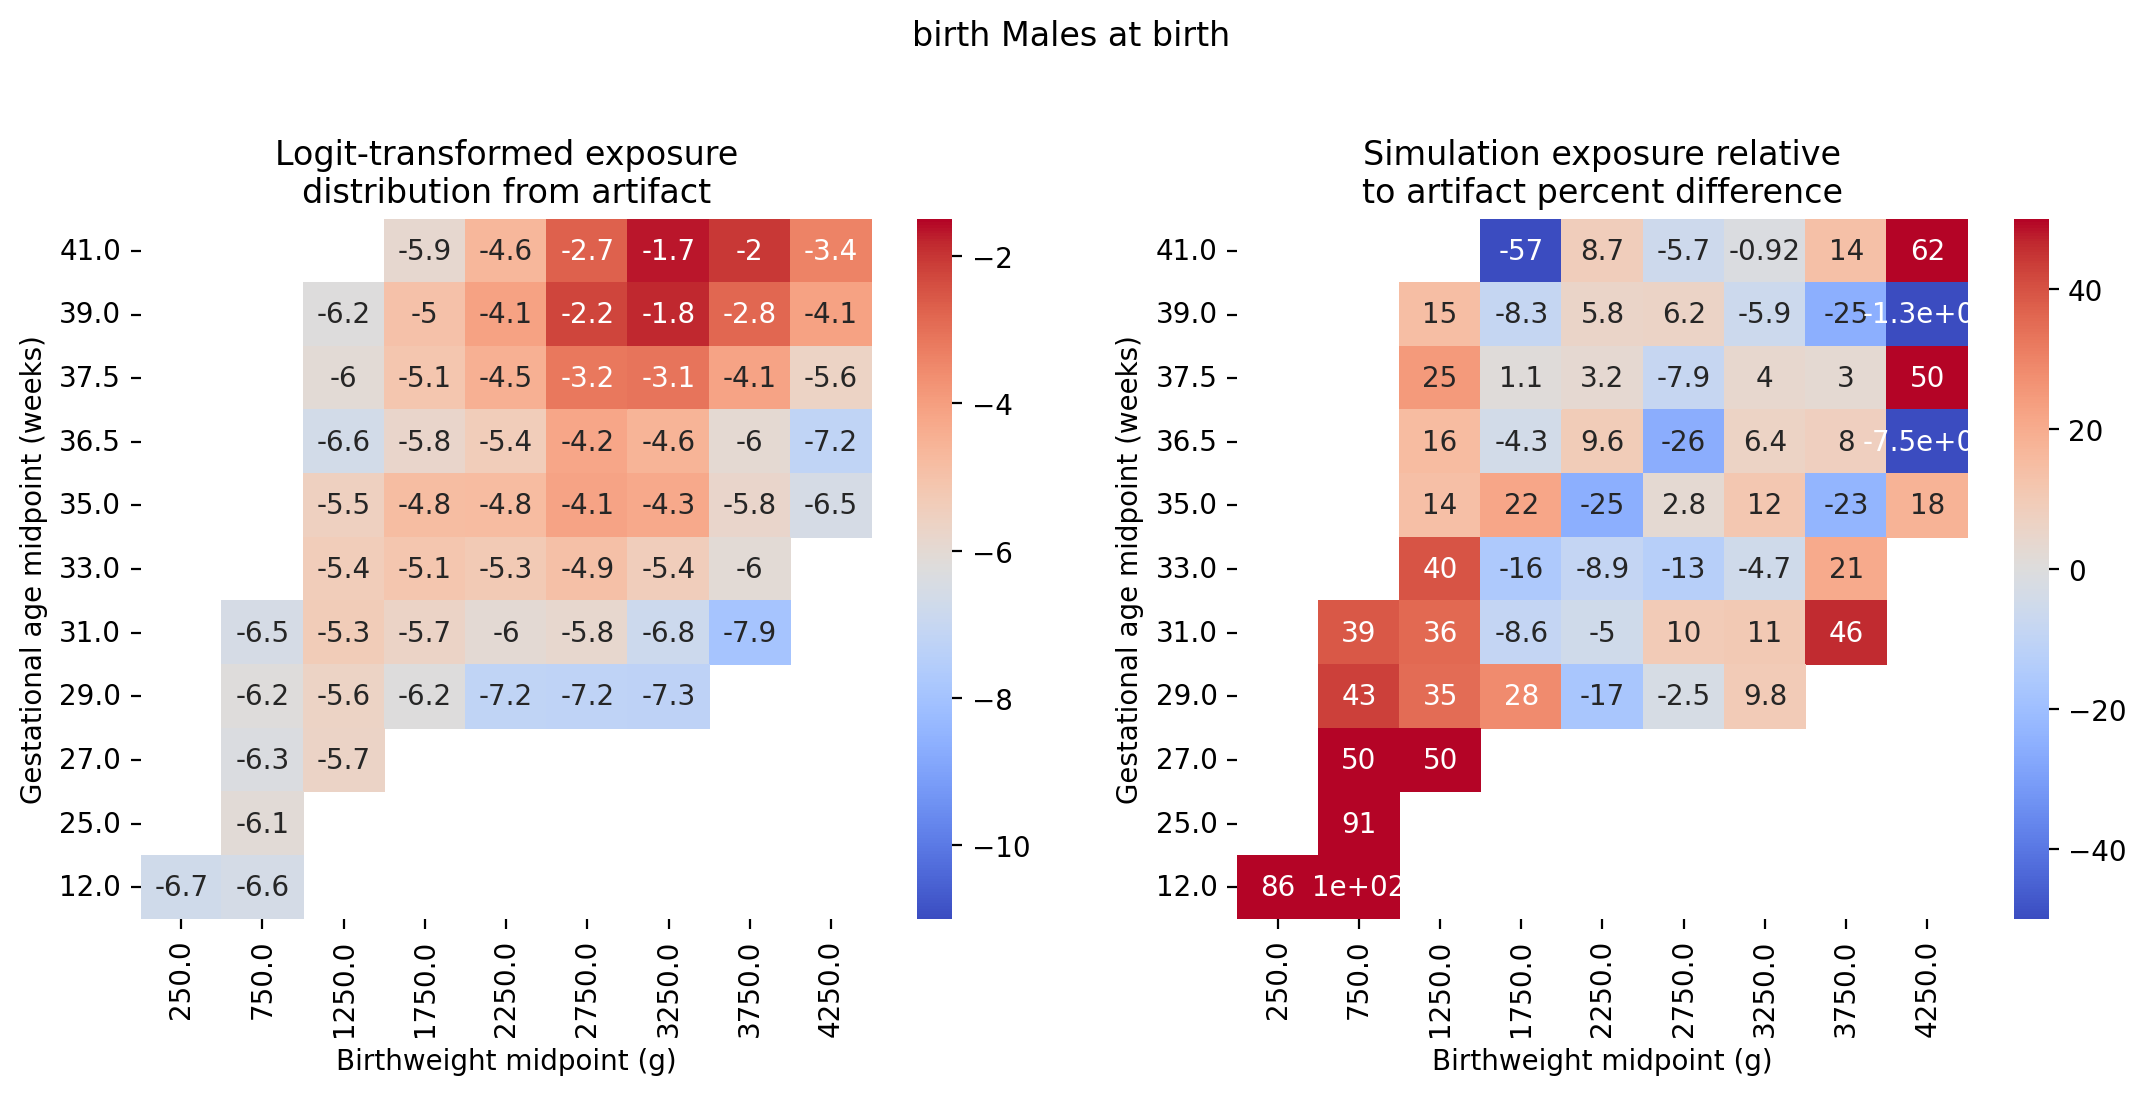

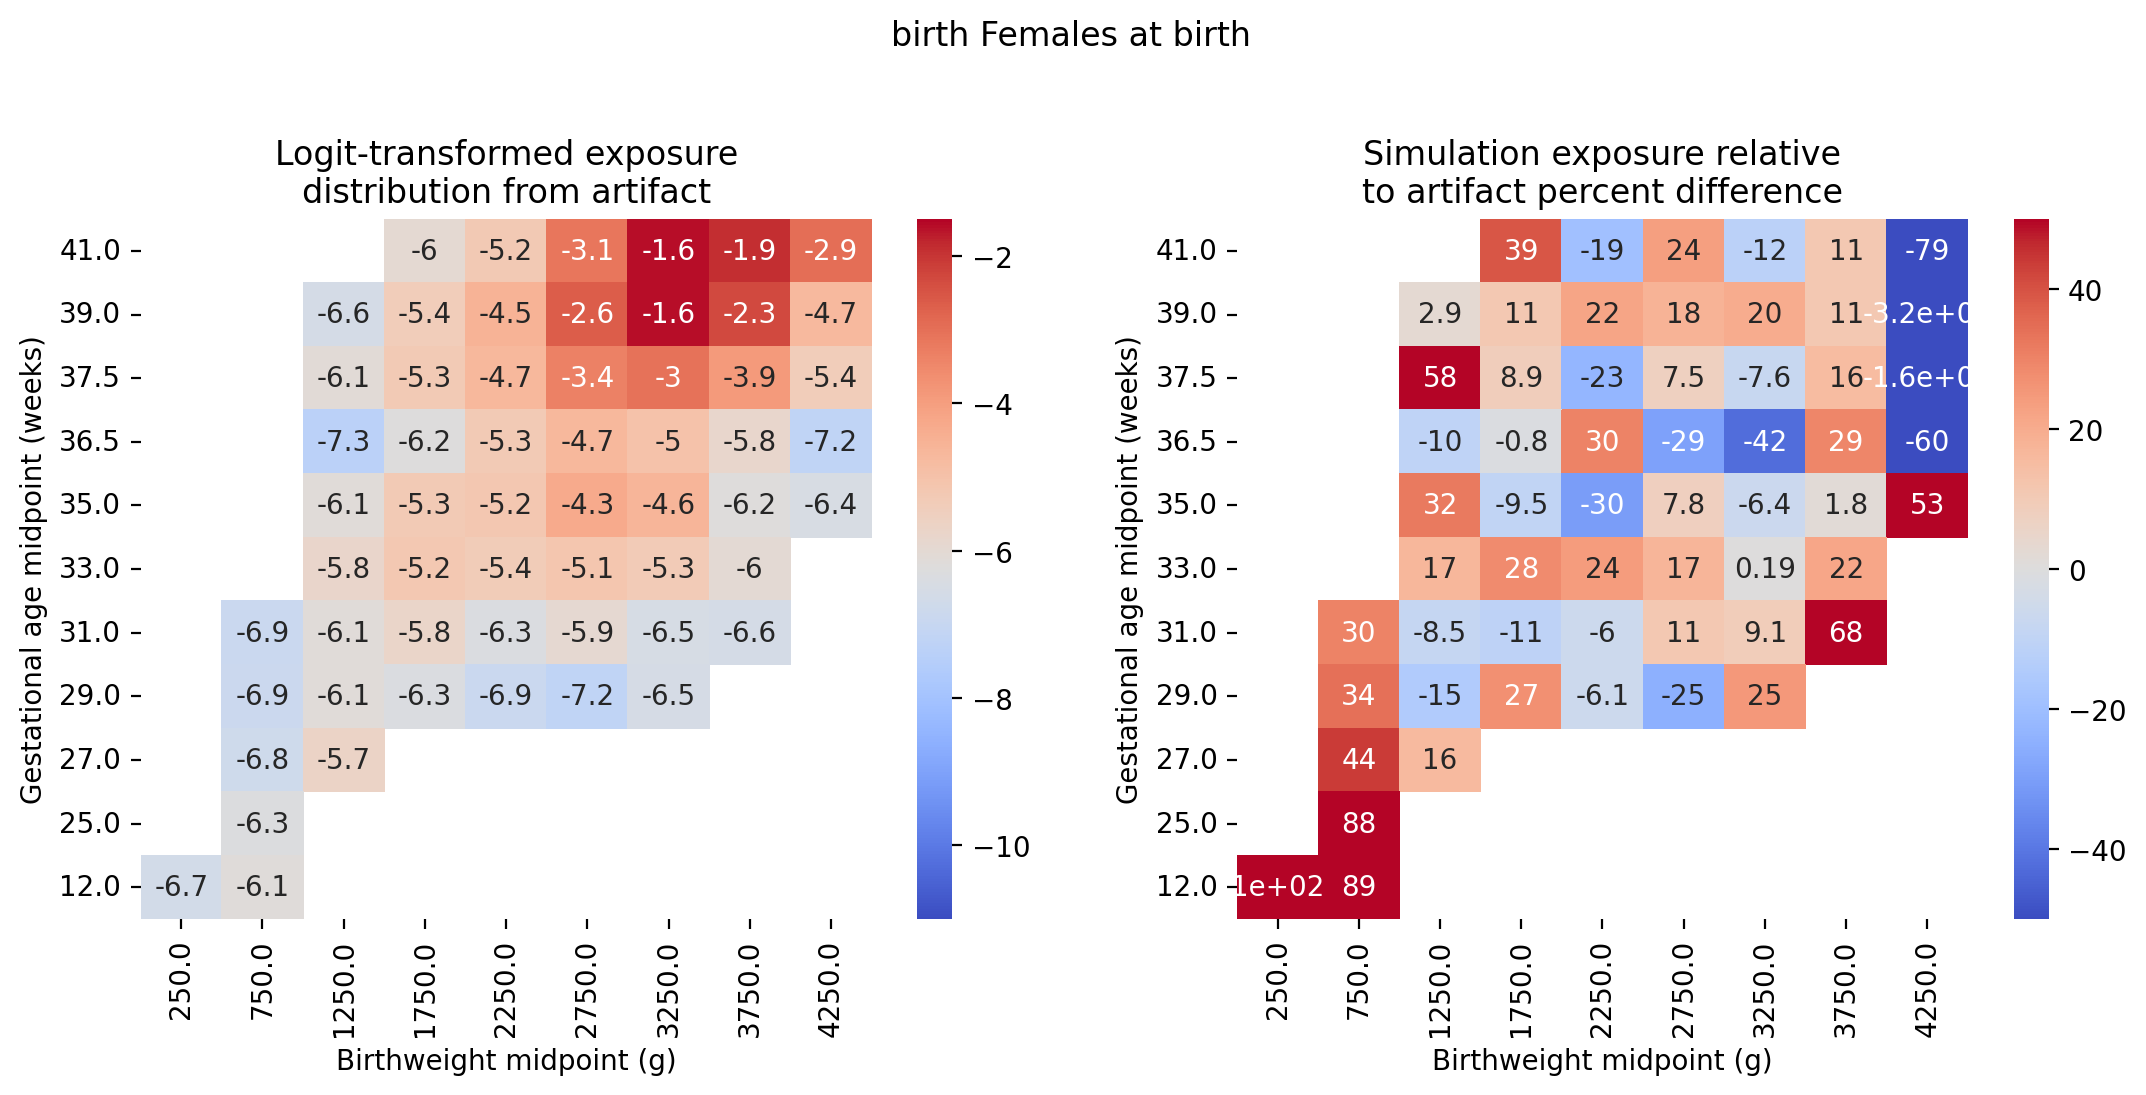

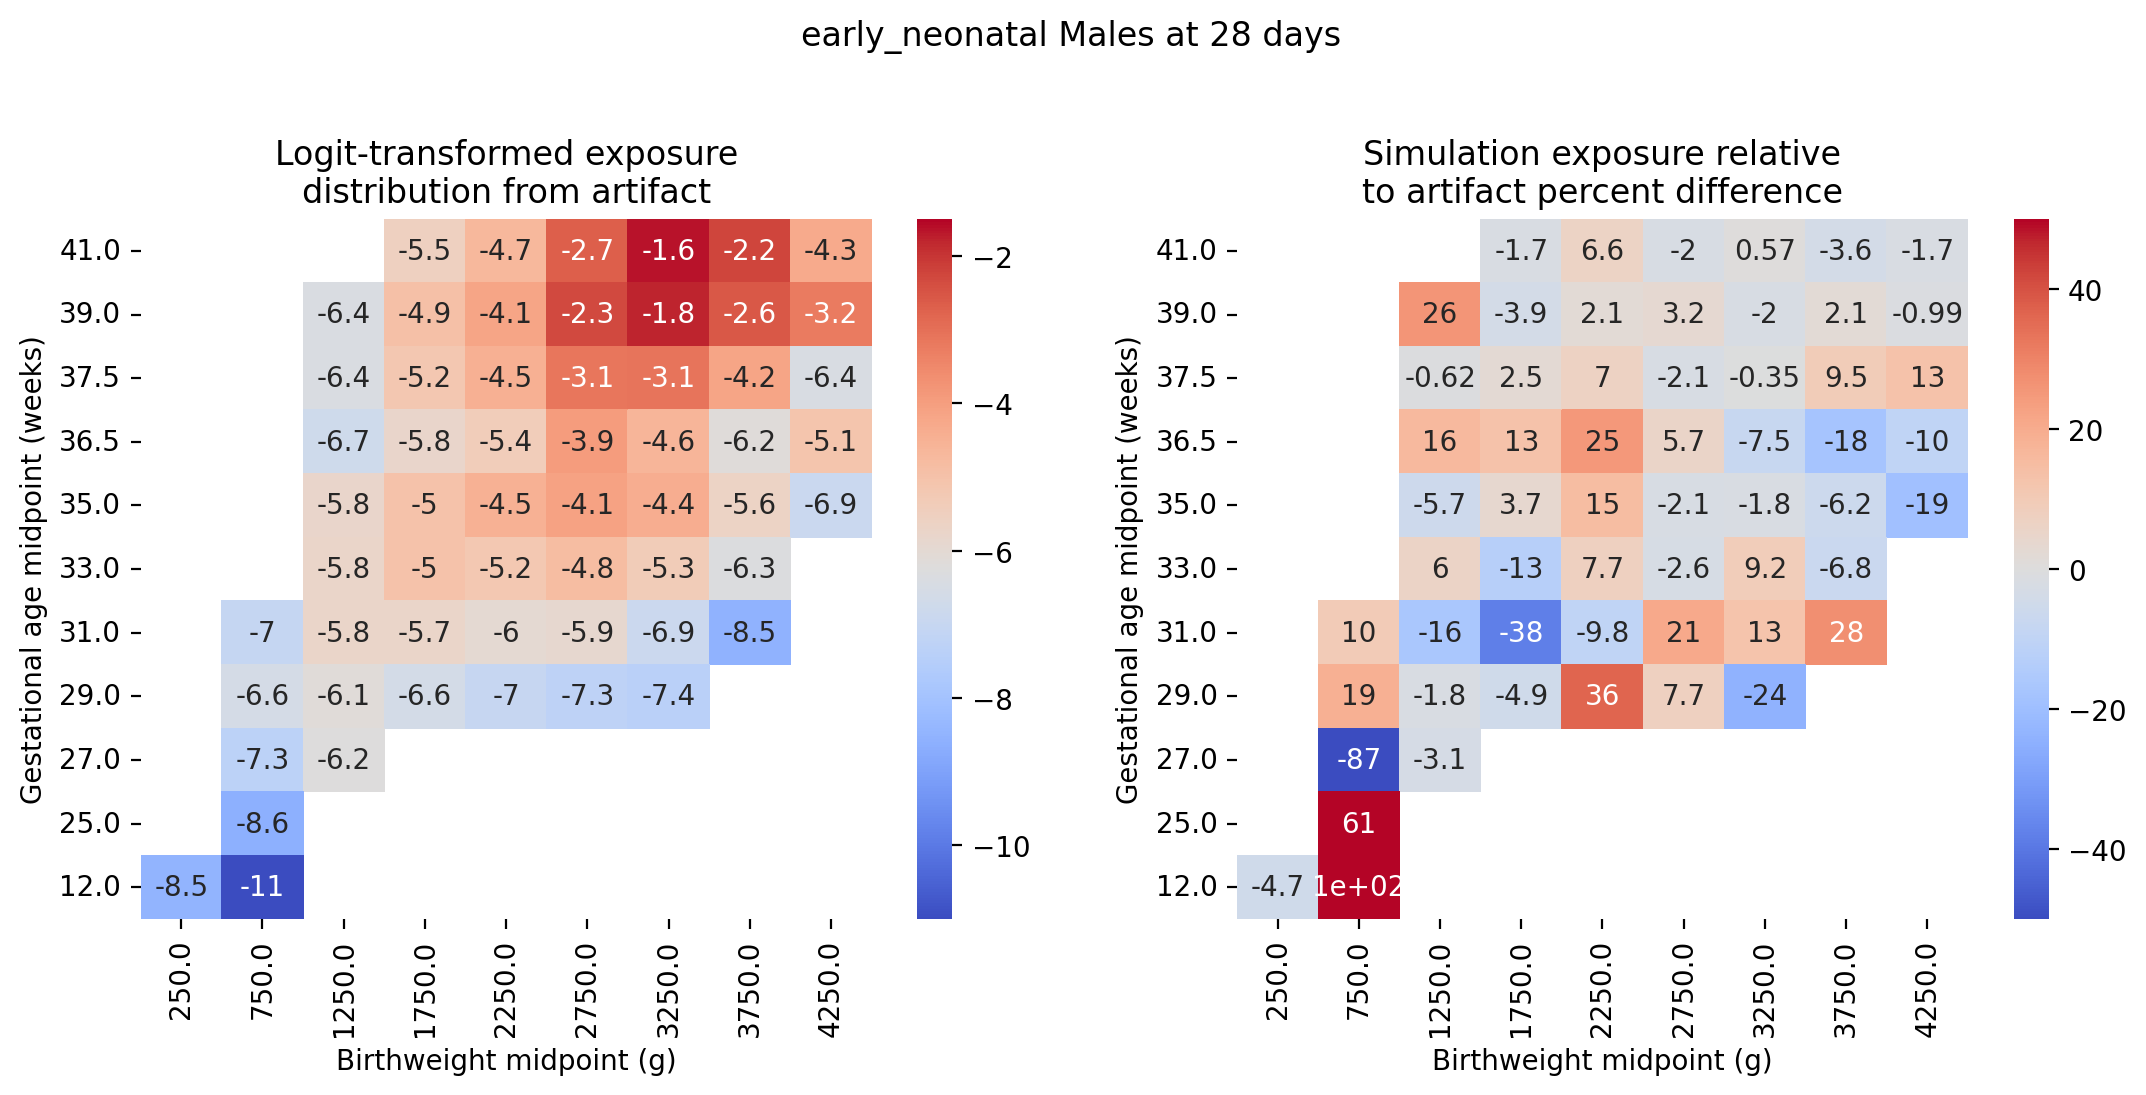

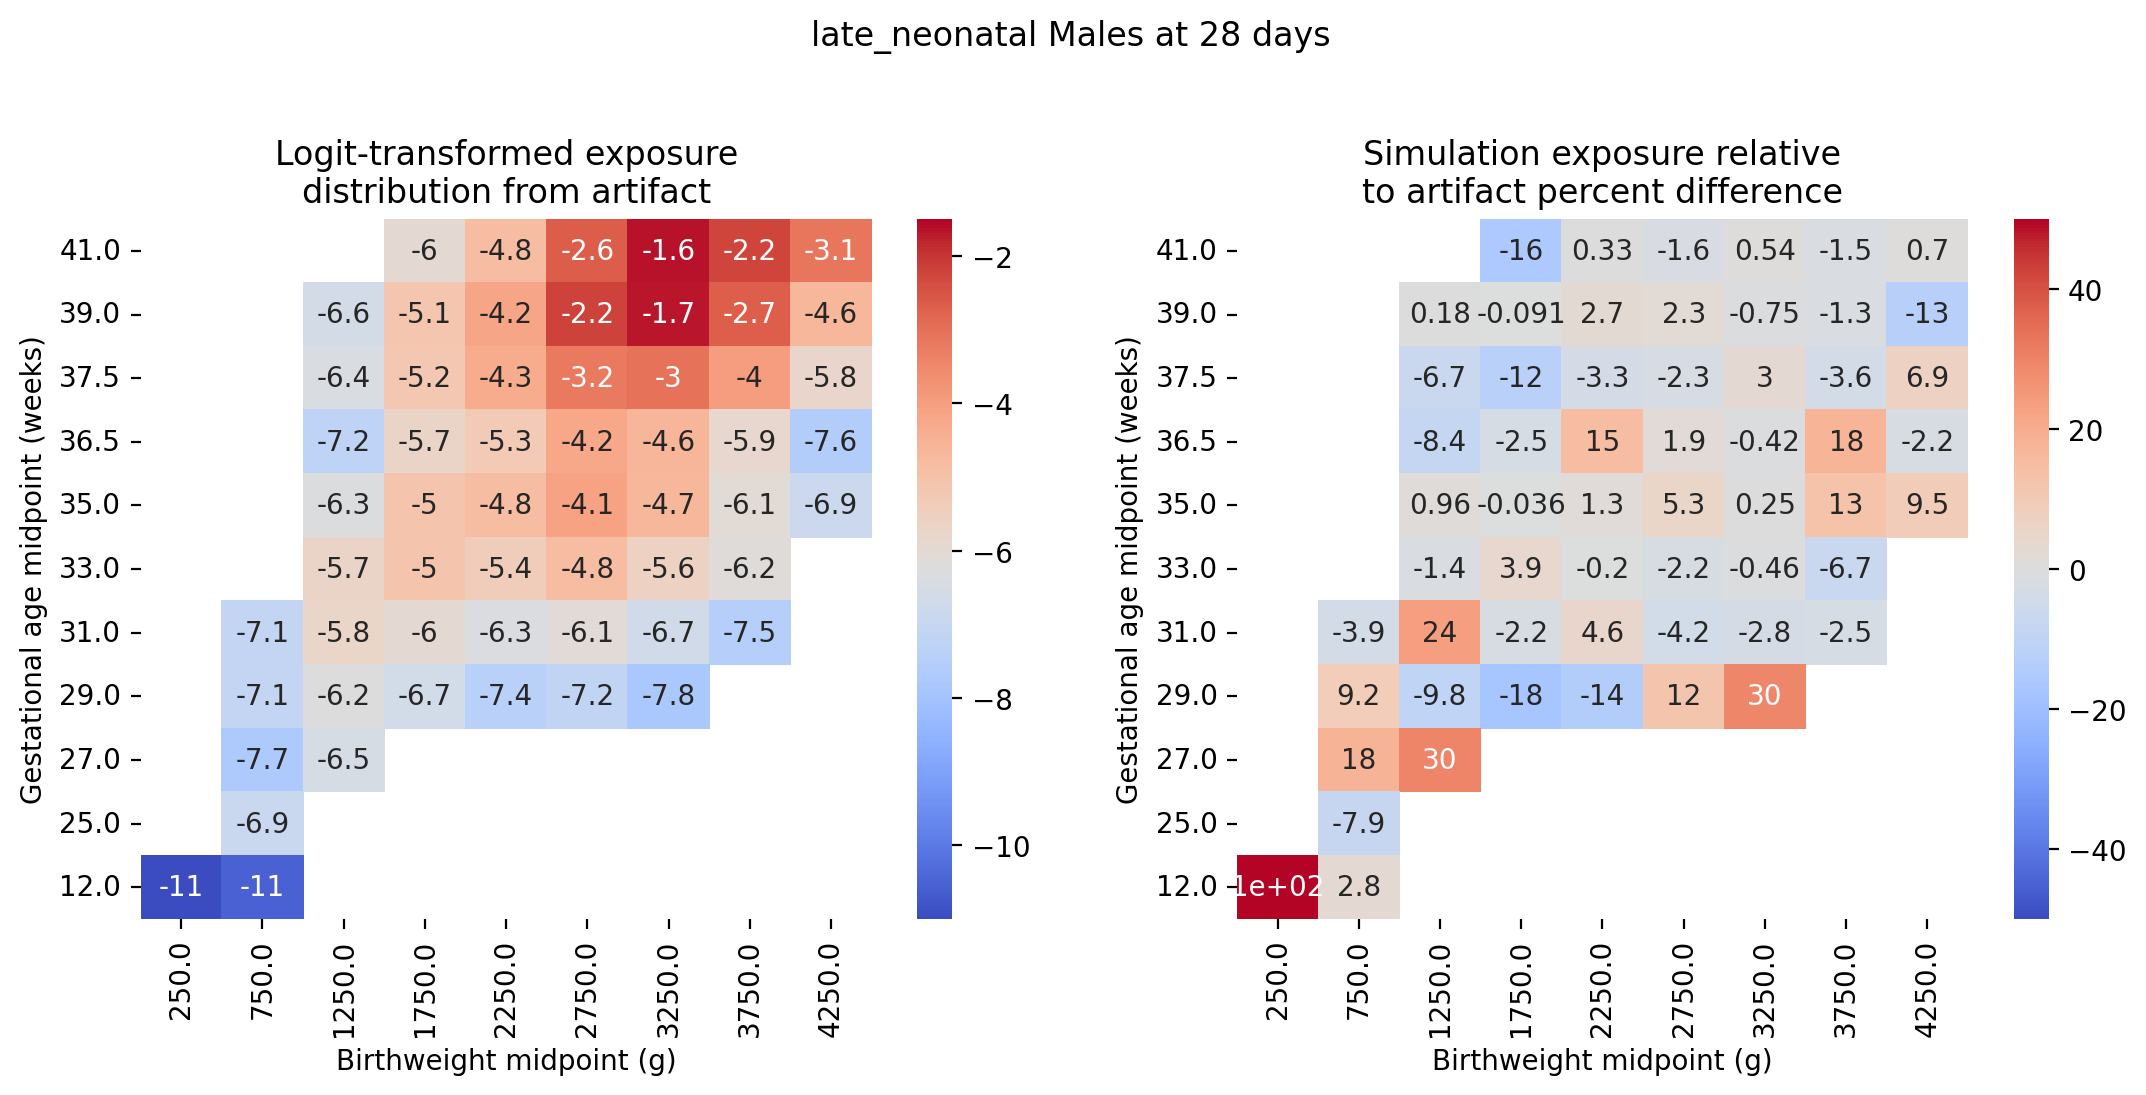

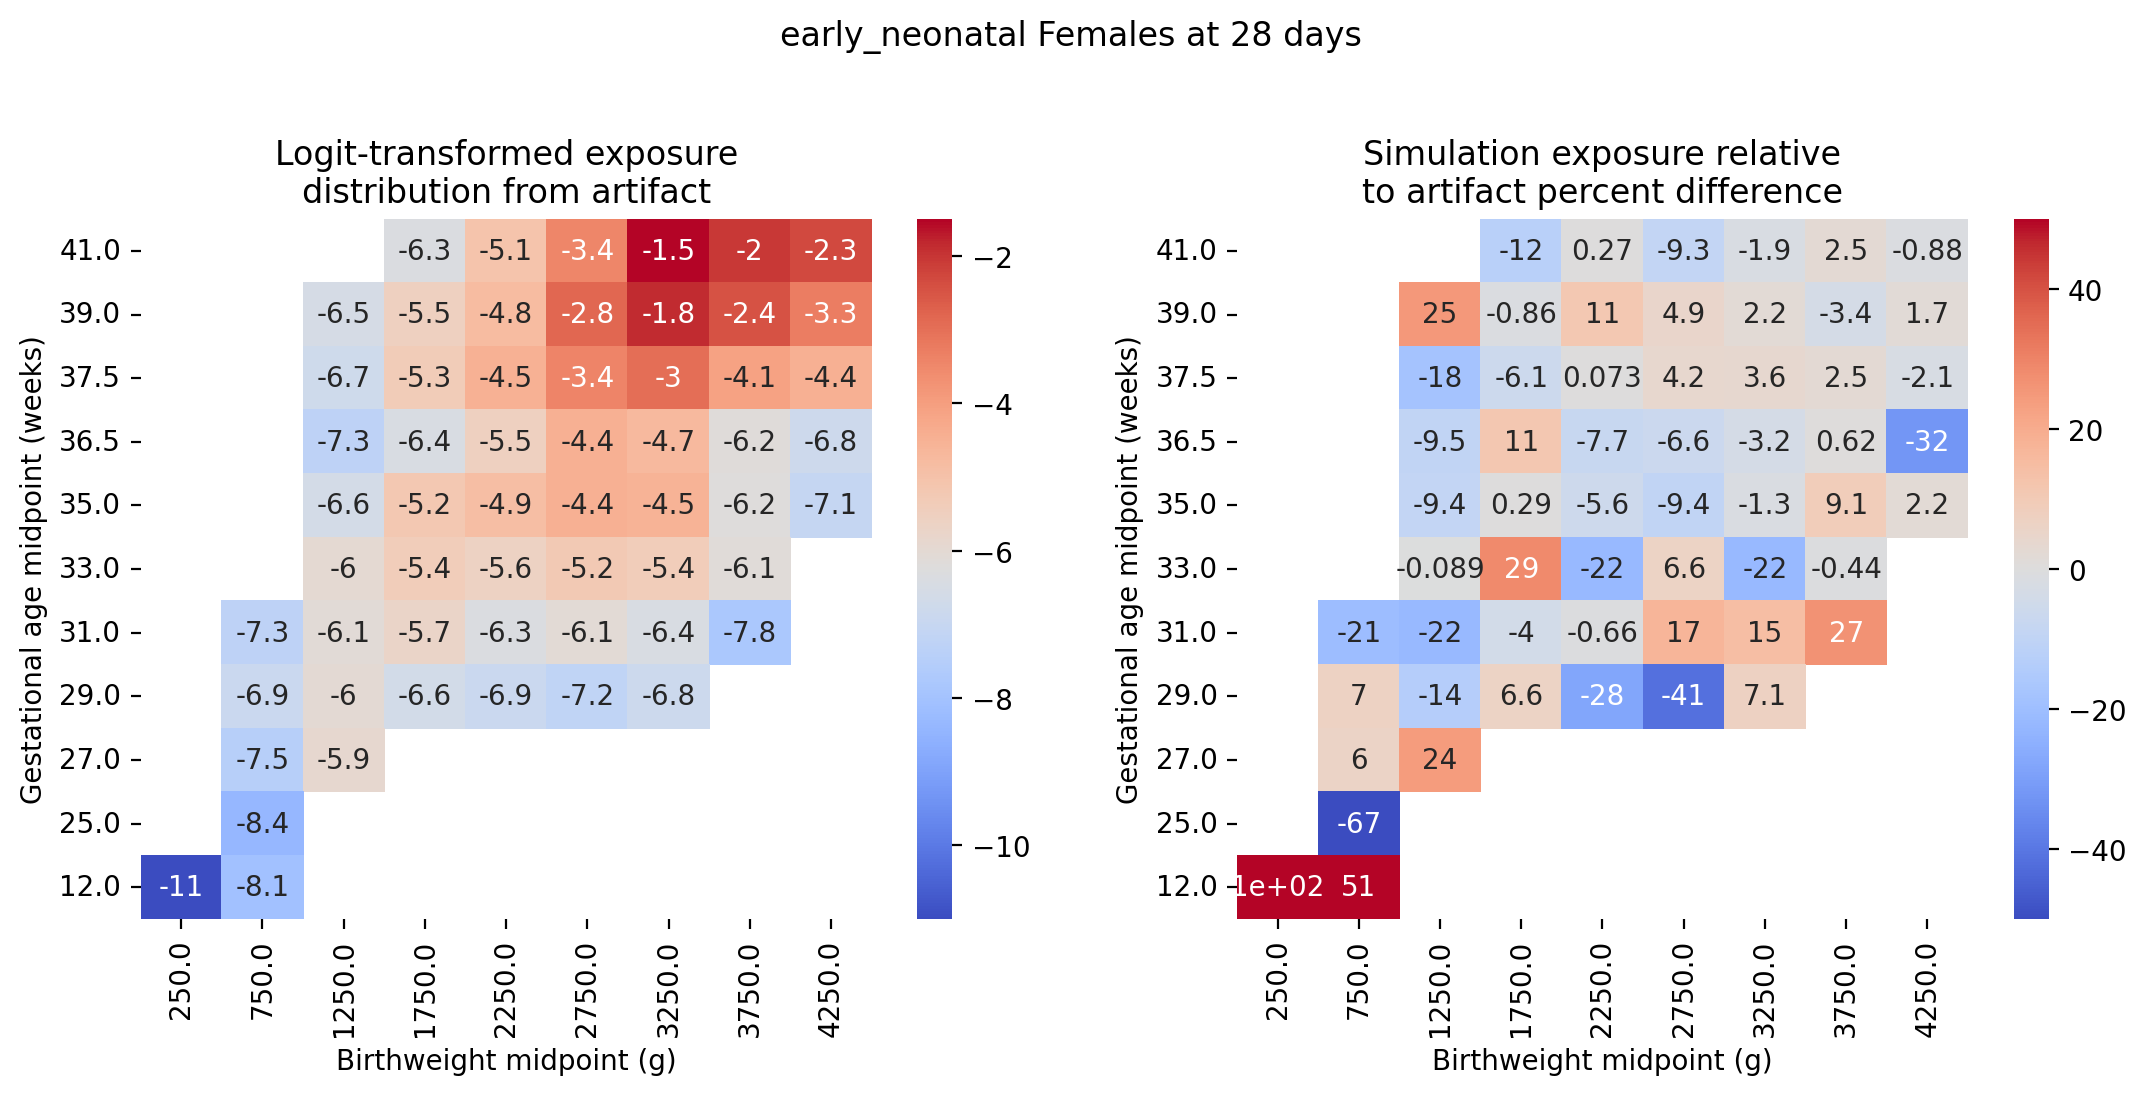

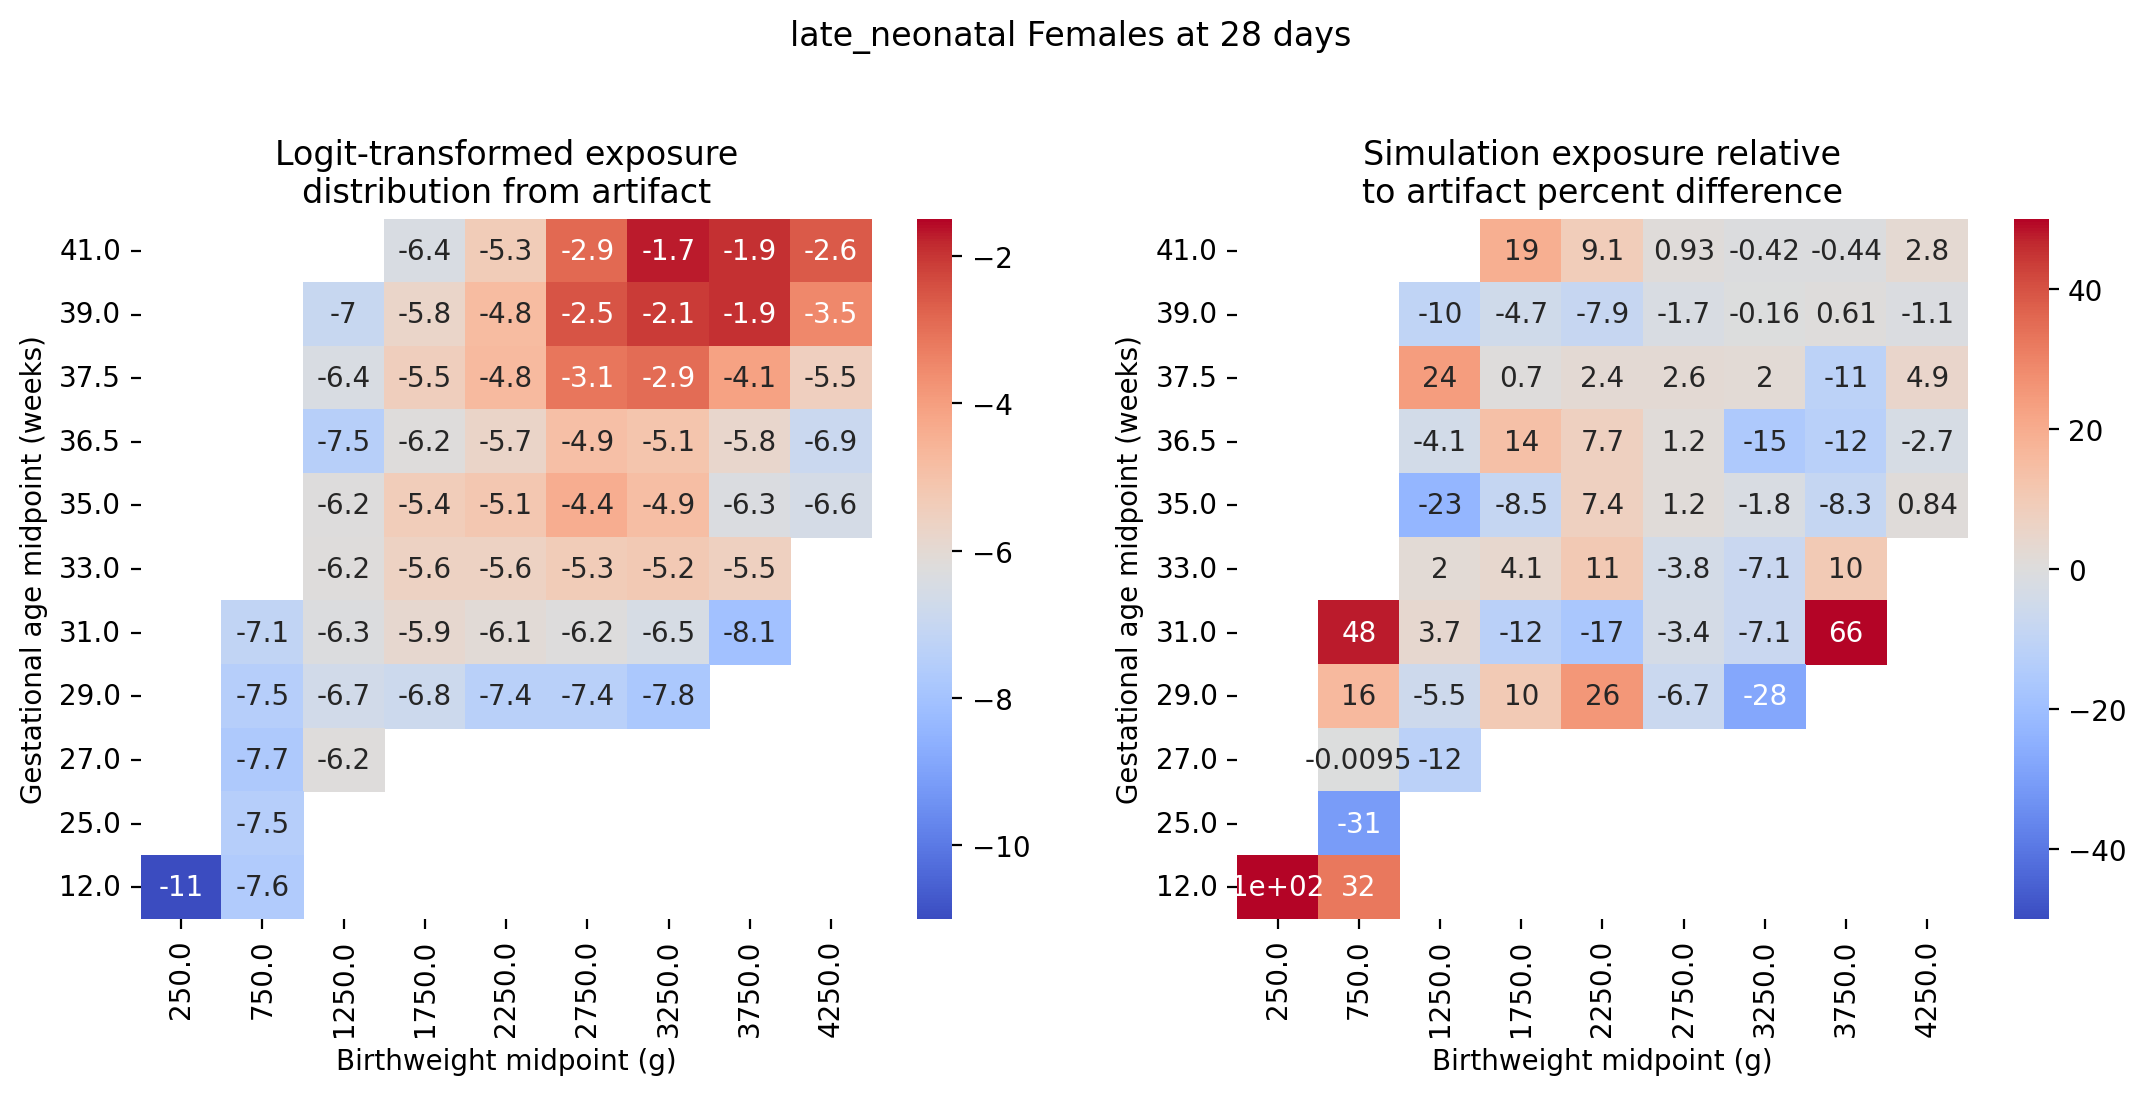

In [51]:
with PdfPages('model_5.0_lbwsg_exposure_updated.pdf') as pdf:
#for sex in ['Male','Female']:
#    for age_group in ['early_neonatal','late_neonatal']:
#        for log in [True,False]:
#            bar_chart(sex, age_group, log=log)
#            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev, 'at initialization')
            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['birth']:
            plot_exposure_heat_map(sex, age_group, births, 'at birth')
            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev1, 'at 28 days')
            pdf.savefig(bbox_inches='tight')

